In [1]:
!pip install pandas matplotlib


In [3]:
from google.colab import files

print("Upload file data_pengangguran.csv kamu:")
uploaded = files.upload()

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['data_pengangguran.csv']))
df.head()


Upload file data_pengangguran.csv kamu:


Saving data_pengangguran.csv to data_pengangguran.csv


,Golongan_Umur,Status,Tahun,Bulan,Jumlah
0,15-19,Pernah,2021,Feb,281236
1,20-24,Pernah,2021,Feb,1338570
2,25-29,Pernah,2021,Feb,1111006
3,30-34,Pernah,2021,Feb,654139
4,35-39,Pernah,2021,Feb,518758


5 baris pertama:
  Golongan_Umur  Status  Tahun Bulan   Jumlah
0         15-19  Pernah   2021   Feb   281236
1         20-24  Pernah   2021   Feb  1338570
2         25-29  Pernah   2021   Feb  1111006
3         30-34  Pernah   2021   Feb   654139
4         35-39  Pernah   2021   Feb   518758

Data total per periode:
Status    Jumlah_penggaguran   Pernah    Tidak
Periode                                       
2021-Agu             9102052  4685168  4416884
2021-Feb             8746008  5466787  3279221
2022-Agu             8425931  3730077  4695854
2022-Feb             8402153  4525287  3878686
2023-Agu             7855075  3791895  4065596
2023-Feb             7989275  4300968  3688307
2024-Agu             7465599  3497369  3928230
2024-Feb             7194862  3198332  3968230

Kolom di pivot: Index(['Jumlah_penggaguran', 'Pernah', 'Tidak'], dtype='object', name='Status')

Periode awal: 2021-Agu
U_pernah_awal = 4685168
U_tidak_awal  = 4416884


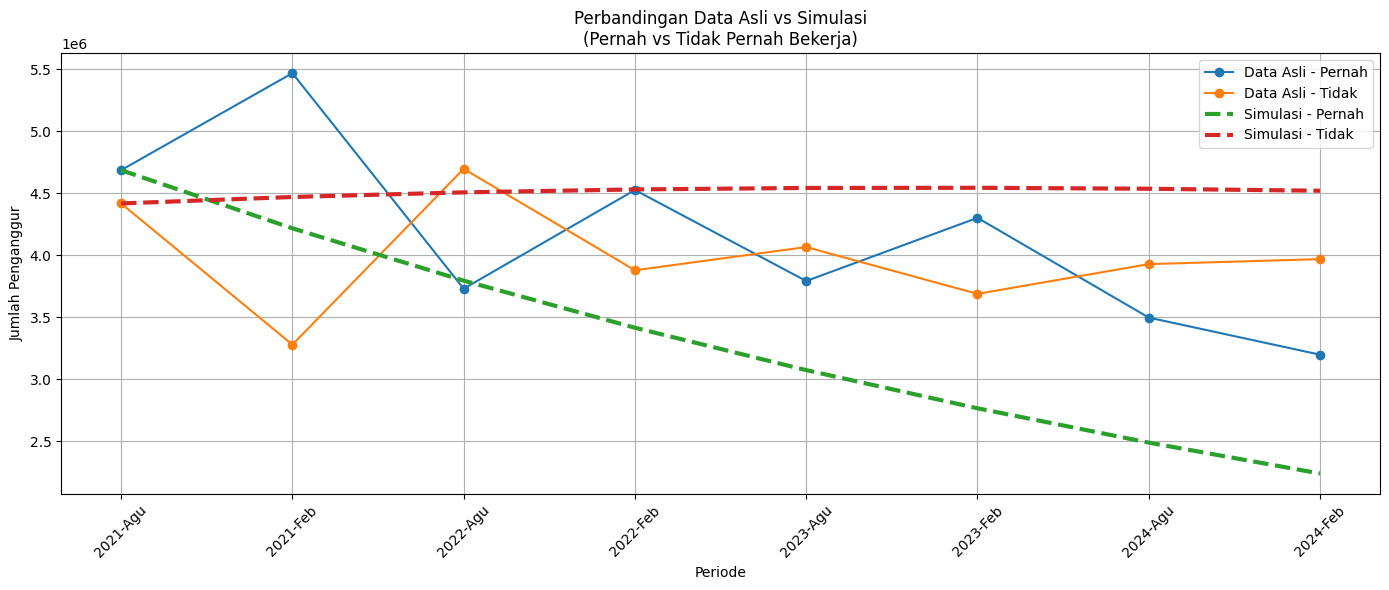

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# dataframe df sudah ada dari upload (Cell 2)

print("5 baris pertama:")
print(df.head())

# 2. BERSIHKAN DAN PILIH DATA YANG DIPAKAI
df_total = df[df["Golongan_Umur"] == "Total"].copy()
df_total["Periode"] = df_total["Tahun"].astype(str) + "-" + df_total["Bulan"]

pivot = df_total.pivot(index="Periode", columns="Status", values="Jumlah")
pivot = pivot.sort_index()

print("\nData total per periode:")
print(pivot)
print("\nKolom di pivot:", pivot.columns)

# SIMULASI DINAMIK
awal_periode = pivot.index[0]
U_pernah_awal = pivot.loc[awal_periode, "Pernah"]
U_tidak_awal = pivot.loc[awal_periode, "Tidak"]

print(f"\nPeriode awal: {awal_periode}")
print("U_pernah_awal =", U_pernah_awal)
print("U_tidak_awal  =", U_tidak_awal)

rate_dapat_kerja_pernah = 0.10
rate_dapat_kerja_tidak  = 0.05
rate_pendatang_baru     = 0.03

jumlah_langkah = len(pivot.index)

sim_periode = []
sim_pernah = []
sim_tidak = []

U_pernah = U_pernah_awal
U_tidak = U_tidak_awal

for step in range(jumlah_langkah):
    periode = pivot.index[step]

    sim_periode.append(periode)
    sim_pernah.append(U_pernah)
    sim_tidak.append(U_tidak)

    total_U = U_pernah + U_tidak

    dapat_kerja_pernah = rate_dapat_kerja_pernah * U_pernah
    dapat_kerja_tidak = rate_dapat_kerja_tidak * U_tidak
    pendatang_baru = rate_pendatang_baru * total_U

    U_pernah = U_pernah - dapat_kerja_pernah
    U_tidak = U_tidak + pendatang_baru - dapat_kerja_tidak

# GRAFIK
plt.figure(figsize=(14,6))
plt.plot(pivot.index, pivot["Pernah"], marker="o", label="Data Asli - Pernah")
plt.plot(pivot.index, pivot["Tidak"], marker="o", label="Data Asli - Tidak")

plt.plot(sim_periode, sim_pernah, linestyle="--", linewidth=3, label="Simulasi - Pernah")
plt.plot(sim_periode, sim_tidak, linestyle="--", linewidth=3, label="Simulasi - Tidak")

plt.xticks(rotation=45)
plt.xlabel("Periode")
plt.ylabel("Jumlah Penganggur")
plt.title("Perbandingan Data Asli vs Simulasi\n(Pernah vs Tidak Pernah Bekerja)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
